In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import re
import string
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
# Reading the dataset
dataset=pd.read_csv('D:\Businessonbot\CoronaTweetsSentimentAnalysis.csv')

In [85]:
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive
...,...,...,...,...,...,...
1983,1984,48737,Paraparaumu Beach,16-03-2020,Just been through K?piti New World which is bu...,Positive
1984,1985,48743,"Cincinnati, Ohio",16-03-2020,"Even though the Law Library is closed, ALL sub...",Positive
1985,1986,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative
1986,1987,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive


In [86]:
# assigning new column by adding values as 0 and 1 for positive and negative
dataset['Res'] = pd.factorize(dataset.Sentiment)[0]

In [87]:
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Res
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,0
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,1
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,0
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive,0
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive,0
...,...,...,...,...,...,...,...
1983,1984,48737,Paraparaumu Beach,16-03-2020,Just been through K?piti New World which is bu...,Positive,0
1984,1985,48743,"Cincinnati, Ohio",16-03-2020,"Even though the Law Library is closed, ALL sub...",Positive,0
1985,1986,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative,1
1986,1987,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,0


In [88]:
print(dataset['Sentiment'])

0       Positive
1       Negative
2       Positive
3       Positive
4       Positive
          ...   
1983    Positive
1984    Positive
1985    Negative
1986    Positive
1987    Negative
Name: Sentiment, Length: 1988, dtype: object


In [89]:
dataset.head(40)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Res
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,0
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,1
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,0
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive,0
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive,0
5,6,44971,NaN,05-03-2020,That's about a week from now. A bit optimistic...,Positive,0
6,7,44973,Malta,05-03-2020,#CoronaVirus #COVID_19 People are starting to ...,Negative,1
7,8,44978,"Wayne County, MI",07-03-2020,Alright yall I hope our Melanin prevails but ...,Positive,0
8,9,44979,"Bondi Beach, Sydney",07-03-2020,When your usual grocery shopping @woolworths t...,Negative,1
9,10,44980,NaN,07-03-2020,Coronavirus panic spreads: Costco is pulling f...,Negative,1


In [90]:
# no of rows and columns
dataset.shape

(1988, 7)

In [91]:
# no of rows
dataset.shape[0]

1988

In [92]:
# no of columns
dataset.shape[1]

7

In [93]:
# describing the dataset
dataset.describe()

,UserName,ScreenName,Res
count,1988.000000,1988.000000,1988.000000
mean,994.500000,46817.972837,0.523642
std,574.030487,1083.483388,0.499566
min,1.000000,44954.000000,0.000000
25%,497.750000,45871.500000,0.000000
50%,994.500000,46822.000000,1.000000
75%,1491.250000,47729.750000,1.000000
max,1988.000000,48747.000000,1.000000


In [94]:
# first 10 rows of the dataset
dataset.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Res
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,0
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,1
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,0
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive,0
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive,0
5,6,44971,NaN,05-03-2020,That's about a week from now. A bit optimistic...,Positive,0
6,7,44973,Malta,05-03-2020,#CoronaVirus #COVID_19 People are starting to ...,Negative,1
7,8,44978,"Wayne County, MI",07-03-2020,Alright yall I hope our Melanin prevails but ...,Positive,0
8,9,44979,"Bondi Beach, Sydney",07-03-2020,When your usual grocery shopping @woolworths t...,Negative,1
9,10,44980,NaN,07-03-2020,Coronavirus panic spreads: Costco is pulling f...,Negative,1


In [95]:
# last 10 rows of the dataset
dataset.tail(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Res
1978,1979,48724,"Houston, TX",16-03-2020,When I'm stopped by George at the grocery stor...,Negative,1
1979,1980,48725,"Louisville, KY",16-03-2020,Due to ongoing public health and safety concer...,Positive,0
1980,1981,48732,NaN,16-03-2020,Stuck inside? How about getting some reading ...,Positive,0
1981,1982,48733,"Kansas, USA",16-03-2020,@GovLauraKelly PLEASE CLOSE ALL RETAIL that is...,Positive,0
1982,1983,48736,Texas,16-03-2020,Amazon delivery infrastructure strained as COV...,Negative,1
1983,1984,48737,Paraparaumu Beach,16-03-2020,Just been through K?piti New World which is bu...,Positive,0
1984,1985,48743,"Cincinnati, Ohio",16-03-2020,"Even though the Law Library is closed, ALL sub...",Positive,0
1985,1986,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative,1
1986,1987,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,0
1987,1988,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,1


In [96]:
# displays the rows with this value as upper limit to display.
pd.options.display.max_rows

500

In [97]:
# displays the columns with this value as upper limit to display.
pd.options.display.max_columns

500

In [98]:
pd.set_option('display.max_rows',500)

In [99]:
pd.set_option('display.max_columns',500)

In [100]:
pd.set_option('display.width',1000)

In [101]:
# prints the information about the dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       1988 non-null   int64 
 1   ScreenName     1988 non-null   int64 
 2   Location       1536 non-null   object
 3   TweetAt        1988 non-null   object
 4   OriginalTweet  1988 non-null   object
 5   Sentiment      1988 non-null   object
 6   Res            1988 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 108.8+ KB


In [102]:
# displays the data type.
dataset.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
Res               int64
dtype: object

In [103]:
# displays the no of unique values in the columns.
dataset.nunique()

UserName         1988
ScreenName       1988
Location         1019
TweetAt            14
OriginalTweet    1988
Sentiment           2
Res                 2
dtype: int64

In [104]:
# counting number of positive and negative sentiments.
dataset.iloc[:,-2].value_counts()

Negative    1041
Positive     947
Name: Sentiment, dtype: int64

<AxesSubplot:>

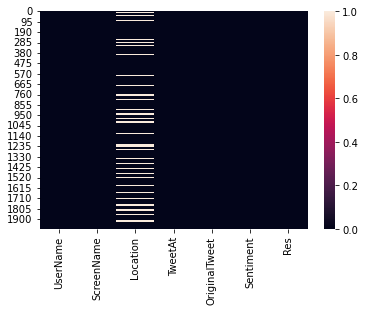

In [105]:
# checking for null values in the dataset by heatmap.
dataset.isnull().sum()
sns.heatmap(dataset.isnull(),cbar=True)

In [106]:
dataset.iloc[0,0]

1

In [107]:
# checking for missing values for an array-like object.
dataset_missing=dataset.isna()
dataset_missing

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Res
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1983,False,False,False,False,False,False,False
1984,False,False,False,False,False,False,False
1985,False,False,False,False,False,False,False
1986,False,False,False,False,False,False,False


In [108]:
dataset_missing.dtypes

UserName         bool
ScreenName       bool
Location         bool
TweetAt          bool
OriginalTweet    bool
Sentiment        bool
Res              bool
dtype: object

In [109]:
# displays the no of missing values in each columns
dataset_missing.sum()

UserName           0
ScreenName         0
Location         452
TweetAt            0
OriginalTweet      0
Sentiment          0
Res                0
dtype: int64

Negative    52.36
Positive    47.64
Name: Sentiment, dtype: float64


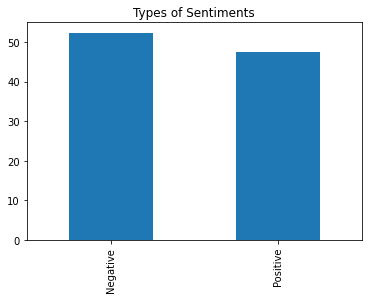

In [110]:
# display the percentage of positives and negatives using bar image
print(round(dataset.Sentiment.value_counts(normalize=True)*100,2))
round(dataset.Sentiment.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Types of Sentiments')
plt.show()

In [111]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       1988 non-null   int64 
 1   ScreenName     1988 non-null   int64 
 2   Location       1536 non-null   object
 3   TweetAt        1988 non-null   object
 4   OriginalTweet  1988 non-null   object
 5   Sentiment      1988 non-null   object
 6   Res            1988 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 108.8+ KB


In [112]:
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Res
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,0
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,1
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,0
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive,0
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive,0


In [113]:
# removing the unwanted attributes
dataset.drop('Location',axis=1,inplace=True)

In [114]:
dataset.head()

,UserName,ScreenName,TweetAt,OriginalTweet,Sentiment,Res
0,1,44954,02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,0
1,2,44956,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,1
2,3,44959,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,0
3,4,44963,04-03-2020,Best quality couches at unbelievably low price...,Positive,0
4,5,44967,04-03-2020,While we were busy watching election returns a...,Positive,0


In [115]:
dataset.drop(['ScreenName','UserName','TweetAt'],axis=1,inplace=True)

In [116]:
dataset.head()

,OriginalTweet,Sentiment,Res
0,When I couldn't find hand sanitizer at Fred Me...,Positive,0
1,#Panic buying hits #NewYork City as anxious sh...,Negative,1
2,Voting in the age of #coronavirus = hand sanit...,Positive,0
3,Best quality couches at unbelievably low price...,Positive,0
4,While we were busy watching election returns a...,Positive,0


In [117]:
dataset.iloc

In [118]:
# cleaning the the dataset by removing the special characters in the original tweet column
def text_clean_1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text
cleaned1=lambda x: text_clean_1(x)

In [119]:
# assigning the new column for the cleaned text
dataset['cleaned_tweet']=pd.DataFrame(dataset.OriginalTweet.apply(cleaned1))
dataset.head(10)

,OriginalTweet,Sentiment,Res,cleaned_tweet
0,When I couldn't find hand sanitizer at Fred Me...,Positive,0,when i couldnt find hand sanitizer at fred mey...
1,#Panic buying hits #NewYork City as anxious sh...,Negative,1,panic buying hits newyork city as anxious shop...
2,Voting in the age of #coronavirus = hand sanit...,Positive,0,voting in the age of coronavirus hand sanitiz...
3,Best quality couches at unbelievably low price...,Positive,0,best quality couches at unbelievably low price...
4,While we were busy watching election returns a...,Positive,0,while we were busy watching election returns a...
5,That's about a week from now. A bit optimistic...,Positive,0,thats about a week from now a bit optimistic ...
6,#CoronaVirus #COVID_19 People are starting to ...,Negative,1,coronavirus people are starting to become fri...
7,Alright yall I hope our Melanin prevails but ...,Positive,0,alright yall i hope our melanin prevails but ...
8,When your usual grocery shopping @woolworths t...,Negative,1,when your usual grocery shopping woolworths tu...
9,Coronavirus panic spreads: Costco is pulling f...,Negative,1,coronavirus panic spreads costco is pulling fr...


In [120]:
# second time cleaning for removing the quotes, full stop,etc. on texts and replacing with empty character
def text_clean_2(text):
    text=re.sub('[''""...]','',text)
    text=re.sub('\n','',text)
    return text
cleaned2=lambda x: text_clean_2(x)

In [121]:
# assigning the new column for second cleaned data
dataset['new_tweet']=pd.DataFrame(dataset['cleaned_tweet'].apply(cleaned2))
dataset.head(10)

,OriginalTweet,Sentiment,Res,cleaned_tweet,new_tweet
0,When I couldn't find hand sanitizer at Fred Me...,Positive,0,when i couldnt find hand sanitizer at fred mey...,when i couldnt find hand sanitizer at fred mey...
1,#Panic buying hits #NewYork City as anxious sh...,Negative,1,panic buying hits newyork city as anxious shop...,panic buying hits newyork city as anxious shop...
2,Voting in the age of #coronavirus = hand sanit...,Positive,0,voting in the age of coronavirus hand sanitiz...,voting in the age of coronavirus hand sanitiz...
3,Best quality couches at unbelievably low price...,Positive,0,best quality couches at unbelievably low price...,best quality couches at unbelievably low price...
4,While we were busy watching election returns a...,Positive,0,while we were busy watching election returns a...,while we were busy watching election returns a...
5,That's about a week from now. A bit optimistic...,Positive,0,thats about a week from now a bit optimistic ...,thats about a week from now a bit optimistic ...
6,#CoronaVirus #COVID_19 People are starting to ...,Negative,1,coronavirus people are starting to become fri...,coronavirus people are starting to become fri...
7,Alright yall I hope our Melanin prevails but ...,Positive,0,alright yall i hope our melanin prevails but ...,alright yall i hope our melanin prevails but ...
8,When your usual grocery shopping @woolworths t...,Negative,1,when your usual grocery shopping woolworths tu...,when your usual grocery shopping woolworths tu...
9,Coronavirus panic spreads: Costco is pulling f...,Negative,1,coronavirus panic spreads costco is pulling fr...,coronavirus panic spreads costco is pulling fr...


In [122]:
# removing the first cleaned data
dataset.drop('cleaned_tweet',axis=1,inplace=True)

In [123]:
dataset.head()

,OriginalTweet,Sentiment,Res,new_tweet
0,When I couldn't find hand sanitizer at Fred Me...,Positive,0,when i couldnt find hand sanitizer at fred mey...
1,#Panic buying hits #NewYork City as anxious sh...,Negative,1,panic buying hits newyork city as anxious shop...
2,Voting in the age of #coronavirus = hand sanit...,Positive,0,voting in the age of coronavirus hand sanitiz...
3,Best quality couches at unbelievably low price...,Positive,0,best quality couches at unbelievably low price...
4,While we were busy watching election returns a...,Positive,0,while we were busy watching election returns a...


In [124]:
# importing required libraries for splitting,removing the unwanted words, repeated words and add meaningful sentence
from nltk.tokenize import word_tokenize
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [125]:
# adding all the values into the single variable

corpus=[]
for i in range (0,len(dataset.new_tweet)):
    Description=re.sub('[^a-zA-Z]'," ",dataset["new_tweet"][i])
    Description=Description.lower()
    Description=Description.split()
    pe=PorterStemmer()
    all_stopword=stopwords.words('english')
    type (all_stopword)
    all_stopword.remove("not")
    Description=[pe.stem(word) for word in Description if not word in set (all_stopword)]
    Description=" ".join(Description)
    corpus.append(Description)

In [126]:
corpus

['couldnt find hand sanit fred meyer turn amazon pack purellcheck coronaviru concern drive price httpstcoygbipbflmi',
 'panic buy hit newyork citi anxiou shopper stock foodampmed suppli healthcar worker becom bigappl confirm coronaviru patient bloomberg stage event qanon cdc',
 'vote age coronaviru hand sanit supertuesday',
 'best qualiti couch unbeliev low price avail order boksburg gp info whatsapp supertuesdsi powertalk sayentrepreneur djsbu',
 'busi watch elect return brace outbreak trump nomin chemicalindustri lobbyist head consum product safeti commiss',
 'that week bit optimist probabl take anoth month suppli chain may recov demand chain nonexist us europ next month two spx qqq es nq',
 'coronaviru peopl start becom frighten panicshop mani shelv meanwhil turn empti good sold facemask amp disinfect liquid sold sold exorbit price blockchain cryptonew',
 'alright hope melanin prevail case took precaut food amp water deliv mask month may open soon fba coronavirususa covid httpstcoct

In [127]:
# splitting the datasets into training and testing
from sklearn.model_selection import train_test_split
x=corpus
y=dataset.Res
x,x_test,y,y_test=train_test_split(x,y,stratify=y,test_size=0.25,random_state=45)

print('IV_train:',len(x))
print('IV_test:',len(x_test))
print('DV_train:',len(y))
print('DV_test:',len(y_test))

IV_train: 1491
IV_test: 497
DV_train: 1491
DV_test: 497


In [128]:
# vectorizing text to numbers
vec=CountVectorizer(stop_words='english')
x=vec.fit_transform(x).toarray()
x_test=vec.transform(x_test).toarray()

In [129]:
# building the model
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()

# model fitting
model.fit(x,y)

MultinomialNB()

In [130]:
# training score
print("Training Score:",model.score(x,y))

Training Score: 0.9537223340040242


In [131]:
# testing score
print("Test Score:",model.score(x_test,y_test))

Test Score: 0.6237424547283702


In [132]:
# checking for the result
example=input("Enter the Review: ")
result=model.predict(vec.transform([example]))
if(result==0):
  print("Positive ✓")
else:
  print("Negative ☐")

Enter the Review: This app is very good and its design is amazing.
Positive ✓
